In [71]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from concurrent.futures import ThreadPoolExecutor
import time
import csv
import numpy as np
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
from fake_useragent import UserAgent
#Setting up ower webdriver options:
ua = UserAgent()
userAgent = ua.random
firefox_profile = webdriver.FirefoxProfile()
#Assigning fake user-agent to our webdriver in order to not being banned:
firefox_profile.set_preference("general.useragent.override", userAgent)
firefox_profile.set_preference('permissions.default.image', 2)
firefox_profile.set_preference('dom.ipc.plugins.enabled.libflashplayer.so', 'false')
driver = webdriver.Firefox(firefox_profile=firefox_profile,executable_path=r"geckodriver")

In [72]:
start = time.time()
#Also some ban preventive maintanence, here we randomizing our pages, order of link openings:
def get_page():
    new_variable = int(np.random.randint(1, 1001))
    while new_variable in page_list:
        new_variable = int(np.random.randint(1, 1001))
    return new_variable
def get_inner_page(n):
    new_variable = int(np.random.randint(0, n))
    while new_variable in inner_page_list:
        new_variable = int(np.random.randint(0, n))
    return new_variable
page_list = []
#Creating our dataframe
df = pd.DataFrame(columns=['fullAddress','userType','ownerName','square','rooms','price','lat','lon','phones','description','photo_url'])
#Here range 5 is scraping only 5 pages as mentioned in homework desc, of course we can scrape more but here is big chance
#that we will be banned
for i in range(5):
    page = get_page()
    driver.get('https://krisha.kz/prodazha/kvartiry/nur-sultan/?page={}'.format(page))
    page_list.append(page)
    pgs = driver.page_source
    soup = BeautifulSoup(pgs,'lxml')
    elements = soup.find_all('a',class_='a-card__title',attrs={"href":True})
    array_of_el = []
    inner_page_list = []
    #Standart loopimg through elements on page,but with randomizer:
    for i in range(len(elements)):
        current_page = get_inner_page(len(elements))
        driver.get('https://krisha.kz{}'.format(elements[current_page]['href']))
        inner_page_list.append(current_page)
        #Also ban preventive maintenance, in order to seem like real user we randomizing our page appearing time
        time.sleep(np.random.uniform(0.2,2))
        pgs2 = driver.page_source
        #I found some loophole in code:
        data = driver.execute_script('return data')
        try:
            url_photo = data['advert']['photos'][0]['src']
        except:
            url_photo = None
        #Catching data returned from data JSON file
        dict1 = {
            'fullAddress':data['adverts'][0]['fullAddress'],
            'userType':data['advert']['userType'],
            'ownerName':data['advert']['ownerName'],
            'square':data['advert']['square'],
            'rooms':data['advert']['rooms'],
            'price':data['advert']['price'],
            'lat':data['advert']['map']['lat'],
            'lon':data['advert']['map']['lon'],
            'phones':data['adverts'][0]['phones'][0],
            'description':data['adverts'][0]['description'],
            'photo_url':url_photo
        }
        array_of_el.append(dict1)
    df2= pd.DataFrame(array_of_el)
    df = df.append(df2,ignore_index=True)
print('time scraped:', time.time()-start, 'seconds')

time scraped: 504.1203577518463 seconds


In [73]:
page_list

[351, 672, 852, 765, 728]

In [74]:
inner_page_list

[14, 17, 15, 2, 10, 9, 6, 11, 18, 0, 3, 19, 8, 16, 4, 1, 12, 5, 7, 13]

##### As we can see our dataframe is full:

In [82]:
df

,fullAddress,userType,ownerName,square,rooms,price,lat,lon,phones,description,photo_url
0,"Нур-Султан (Астана), Мухтар Ауезов 56 — Молдог...",owner,id21330440,47.00,2,18000000,51.185874,71.419376,+7 701 299 3993,"кирпичный дом, 1985 г.п., состояние: хорошее, ...",https://photos-kr.kcdn.kz/webp/d6/d637f32b-4b1...
1,"Нур-Султан (Астана), Сатпаева 23 — Момышулы",owner,Катя,80.00,2,35000000,51.141895,71.472812,+7 777 263 9483,"жил. комплекс Достык, монолитный дом, 2010 г.п...",https://photos-kr.kcdn.kz/webp/bf/bf51513d-db2...
2,"Нур-Султан (Астана), Алматы р-н, Байтурсынова ...",owner,id14856105,53.50,2,24000000,50.304319,72.090836,+7 776 481 8883,"жил. комплекс Астана сәні, монолитный дом, 201...",https://photos-kr.kcdn.kz/webp/f6/f6ff9dee-8d7...
3,"Нур-Султан (Астана), Есиль р-н, Достык 5/1",specialist,Сакенов Азамат,170.00,4,67000000,51.128399,71.421715,+7 708 656 9289,"жил. комплекс Северное сияние, монолитный дом,...",https://photos-kr.kcdn.kz/webp/9b/9be03f88-7bb...
4,"Нур-Султан (Астана), Алматы р-н, Кошкарбаева 80",owner,gulchik_1985,35.00,1,12500000,51.150420,71.527895,+7 771 505 7766,"<span class=""a-is-mortgaged"">В залоге</span>, ...",None
...,...,...,...,...,...,...,...,...,...,...,...
95,"Нур-Султан (Астана), проспект Женис 17Б",specialist,Каримова Мунира,54.80,2,17300000,51.168645,71.411843,+7 700 550 0820,"кирпичный дом, 2004 г.п., Внимание ! СРОЧНАЯ П...",https://photos-kr.kcdn.kz/webp/fd/fd71b60b-a60...
96,"Нур-Султан (Астана), Сарыарка р-н, Женис 49 — ...",specialist,Елтайулы Мухтархан,32.00,1,8900000,51.180074,71.409310,+7 776 970 5937,"панельный дом, 1966 г.п., состояние: хорошее, ...",https://photos-kr.kcdn.kz/webp/38/385895dc-508...
97,"Нур-Султан (Астана), Сарыарка р-н, Кенесары — ...",company,Отдел продаж Астана,57.76,2,17907910,51.162701,71.401126,+7 777 079 0451,"монолитный дом, 2021 г.п., потолки 3м., Ипотек...",https://photos-kr.kcdn.kz/webp/22/22f2036e-1cf...
98,"Нур-Султан (Астана), Сарыарка р-н, Мкр Самал 1",specialist,Нусупова Саягуль,89.80,3,31500000,51.154202,71.429225,+7 707 189 0321,"монолитный дом, 1999 г.п., состояние: среднее,...",https://photos-kr.kcdn.kz/webp/6f/6fe80d95-583...


In [84]:
df.to_excel('homework5.xls')

#### Some visualization and statistics:

In [120]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import folium

In [90]:
grouped = df.groupby(by=['userType'],as_index=False).agg({'fullAddress':'count'})

In [97]:
px.pie(grouped,values='fullAddress',names='userType')

In [113]:
m = folium.Map(location=[df['lat'].mean(), df['lon'].mean()],zoom_start=10)

In [112]:
for i in range(0,len(df)):
    folium.Marker([df.iloc[i]['lat'], df.iloc[i]['lon']], popup=df.iloc[i]['fullAddress']).add_to(m)
m

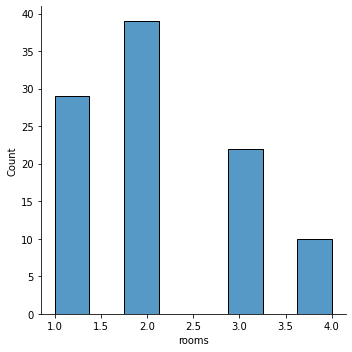

In [124]:
import seaborn as sns
fig = sns.displot(df['rooms'])
plt.show()

In [126]:
fig = px.box(df, x="price")
fig.show()

As we can see from graphs, on the website large amount of adverts is from specialists, also we can see that price range stuck within 15kk and 30kk.

## Conclusion: It must be pointed out, but here is always possibilities to do job more effective, and in the case of scraping, you always can find a new way of data representation in source code as did i.